# Advaced pangaeapy usage: Generalized Additive Models (GAM)

This example is inspired by the excellent blog post by Gavin Simpson who was using PANGAEA data and pangaear to apply GAM on a foraminiferal d18Orecord. 
The blog ost can be found here:
https://www.fromthebottomoftheheap.net/2016/12/16/pangaea-r-open-palaeo-data/

In [ ]:
from pangaeapy import PanDataSet
from matplotlib import pyplot as plt

In addition to pangaepy and matplotlib for plotting we need the pygam module developed by Daniel Servén (https://github.com/dswah/pyGAM) 

In [1]:
from pygam import LinearGAM

Now we load the dataset an plot d18o against Age to see the data:

In [2]:
ds = PanDataSet('10.1594/PANGAEA.857573')

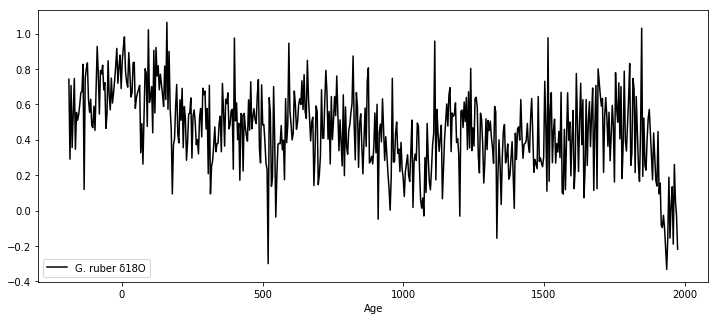

In [4]:
ds.data.plot(x='Age',y='G. ruber δ18O', figsize=(12,5), color='k')

In [5]:
X=ds.data['Age'].values
y=ds.data['G. ruber δ18O'].values

We plot the data using matplotlib and perform a LinearGAM fit. Using the 'lam' and 'n_splines' attributes we can control smoothness of the curve fitting.
Then we add a plot of the 95% confidence intervals as a shaded area. Voila:

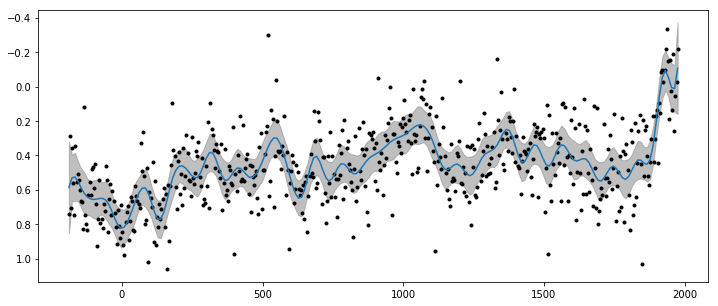

In [7]:
fig = plt.figure(figsize = (12,5))
plt.plot(X,y, '.',color='k', label='observations')
gam=LinearGAM(lam=0.00007, n_splines=50).fit(X,y)
XX=gam.generate_X_grid(term=0, n=200)
yConf=gam.confidence_intervals(XX, width=.95)
plt.plot(XX, gam.predict(XX))
#plt.plot(XX, yConf, color='y', ls='--')
plt.fill_between(XX[:,0], yConf[:,0], yConf[:,1], color='grey', alpha='0.5')
plt.gca().invert_yaxis()

In [8]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     49.9583
Link Function:                     IdentityLink Log Likelihood:                                 -6604.8118
Number of Samples:                          560 AIC:                                            13311.5402
                                                AICc:                                           13321.9634
                                                GCV:                                                0.0378
                                                Scale:                                              0.0318
                                                Pseudo R-Squared:                                   0.4528
Feature Function                  Lam

C:\Users\Robert\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.
